In [5]:
import pandas as pd
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from tqdm import tqdm

In [6]:
pop = pd.read_csv('pop_music.csv').drop('Unnamed: 0', axis=1)
print(pop.shape)
pop.head()

(36451, 22)


,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,track_id,artist_id,genre,is_pop
0,0.465,['Three Dog Night'],0.629,166707,0.376,0,0.000000,7,0.2350,-13.934,1,It Ain't Easy,26,1970-01-01,0.0337,76.848,0.347,1970,2hKxnhi2Eb3443AQbOnqNl,4FAEZeJcsYYBkNq2D3KGTV,"['album rock', 'art rock', 'blues rock', 'bril...",True
1,0.166,['Martha Reeves & The Vandellas'],0.417,176573,0.753,0,0.000000,9,0.2690,-10.204,0,I Should Be Proud,33,1970,0.1260,178.408,0.794,1970,2nxSAQBvF6gDIwZmG6B9nO,1Pe5hlKMCTULjosqZ6KanP,"['brill building pop', 'classic girl group', '...",True
2,0.840,['Roberto Luti'],0.526,158387,0.501,0,0.000000,0,0.1390,-8.088,1,Celoso,39,1970-08-28,0.0367,113.546,0.762,1970,5FD1IZKwXVSL3zGwlNvLoF,33Cme6gMFRML19GrfipNMH,['pop romantico'],True
3,0.908,['Dionne Warwick'],0.691,179040,0.157,0,0.000007,1,0.0898,-13.711,1,Raindrops Keep Falling on My Head,36,1970,0.0475,89.844,0.378,1970,5o5fCEeIGC8igGmbXQZL8Q,2JSjCHK79gdaiPWdKiNUNp,"['adult standards', 'brill building pop', 'dis...",True
4,0.908,['Johnny Mathis'],0.609,149627,0.380,0,0.001520,5,0.0728,-10.527,1,Raindrops Keep Fallin' On My Head,31,1970-02-25,0.0343,109.514,0.612,1970,6BZaceyM6nWzq0AUFcaEX1,21LGsW7bziR4Ledx7WZ1Wf,"['adult standards', 'brill building pop', 'eas...",True


# Preprocessing #

In [7]:
# create new data frame with only necessary features for modeling
pop_model = pop.drop(['artists', 'name', 'popularity', 'release_date', 'year', 'artist_id', 'genre', 'is_pop'], axis=1)
pop_model.set_index('track_id', inplace=True)
print(pop_model.shape)
pop_model.head()

(36451, 13)


,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
track_id,,,,,,,,,,,,,
2hKxnhi2Eb3443AQbOnqNl,0.465,0.629,166707,0.376,0,0.000000,7,0.2350,-13.934,1,0.0337,76.848,0.347
2nxSAQBvF6gDIwZmG6B9nO,0.166,0.417,176573,0.753,0,0.000000,9,0.2690,-10.204,0,0.1260,178.408,0.794
5FD1IZKwXVSL3zGwlNvLoF,0.840,0.526,158387,0.501,0,0.000000,0,0.1390,-8.088,1,0.0367,113.546,0.762
5o5fCEeIGC8igGmbXQZL8Q,0.908,0.691,179040,0.157,0,0.000007,1,0.0898,-13.711,1,0.0475,89.844,0.378
6BZaceyM6nWzq0AUFcaEX1,0.908,0.609,149627,0.380,0,0.001520,5,0.0728,-10.527,1,0.0343,109.514,0.612


In [8]:
# create list for different types of features for access later
num_features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
                'speechiness', 'tempo', 'valence']
cat_features = ['explicit', 'mode', 'key']

### Using Gower Distance ###

Because the data contains a mixture of both numerical and categorical features, we will be using Gower Distance to calculate the similarity between two observations. Gower distance is on the range of 0 (identical) to 1 (maximally different). This will be very useful for including the categorical variables in the model.

### Calculate Matrix of Similarities Between All Tracks ###

In [13]:
# create a list of cat_features indicators
cat_ind = [True if x in cat_features else False for x in pop_model.columns]

gdf = gower.gower_matrix(pop_model, cat_features=cat_ind)

In [174]:
gdf_model = pd.DataFrame(gdf, index=pop_model.index)
print(gdf_model.shape)
gdf_model.head()

(36451, 36451)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,36426,36427,36428,36429,36430,36431,36432,36433,36434,36435,36436,36437,36438,36439,36440,36441,36442,36443,36444,36445,36446,36447,36448,36449,36450
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2hKxnhi2Eb3443AQbOnqNl,0.000000,0.318137,0.190260,0.154133,0.166769,0.181071,0.200302,0.182654,0.285563,0.178499,0.179381,0.099288,0.247378,0.211589,0.275625,0.105691,0.150809,0.245769,0.269703,0.133423,0.167526,0.140402,0.220700,0.204026,0.139491,...,0.219884,0.119930,0.145708,0.201619,0.172243,0.167616,0.364336,0.316340,0.330993,0.399585,0.184455,0.248420,0.364312,0.310168,0.317192,0.278278,0.157054,0.134117,0.417235,0.187655,0.254883,0.259855,0.087099,0.192624,0.144887
2nxSAQBvF6gDIwZmG6B9nO,0.318137,0.000000,0.285791,0.376135,0.322953,0.262695,0.359025,0.297781,0.197825,0.213617,0.214328,0.322283,0.216653,0.280581,0.234321,0.268567,0.222398,0.296164,0.280324,0.267091,0.307812,0.276694,0.361751,0.230545,0.420548,...,0.231186,0.335621,0.297543,0.384401,0.268204,0.338057,0.255465,0.193491,0.291956,0.233176,0.249471,0.214301,0.270365,0.370385,0.356578,0.187212,0.305455,0.217161,0.258285,0.261984,0.296490,0.362888,0.295891,0.251158,0.292260
5FD1IZKwXVSL3zGwlNvLoF,0.190260,0.285791,0.000000,0.177559,0.121840,0.151540,0.183514,0.050899,0.260644,0.214327,0.191458,0.122024,0.232669,0.245654,0.198692,0.207400,0.199922,0.272331,0.270165,0.150099,0.183621,0.191044,0.213177,0.072795,0.238350,...,0.205210,0.206402,0.187215,0.166264,0.186243,0.194684,0.336977,0.201502,0.337658,0.362718,0.207924,0.101529,0.387745,0.299675,0.337173,0.280025,0.114712,0.235124,0.384617,0.200402,0.376386,0.230142,0.166541,0.212572,0.113681
5o5fCEeIGC8igGmbXQZL8Q,0.154133,0.376135,0.177559,0.000000,0.136289,0.217068,0.145480,0.157355,0.266697,0.236650,0.229464,0.152851,0.258652,0.222938,0.261645,0.237329,0.193632,0.215215,0.235955,0.190081,0.111255,0.185194,0.175165,0.236647,0.166942,...,0.259546,0.154454,0.172679,0.237689,0.130795,0.215111,0.389808,0.341288,0.362838,0.434126,0.225895,0.251881,0.413174,0.258192,0.317121,0.312380,0.197843,0.247111,0.378224,0.223334,0.366739,0.302505,0.195651,0.170708,0.194413
6BZaceyM6nWzq0AUFcaEX1,0.166769,0.322953,0.121840,0.136289,0.000000,0.171277,0.089381,0.125636,0.249391,0.216901,0.210000,0.107462,0.237270,0.229925,0.218925,0.199799,0.189995,0.252812,0.186970,0.168858,0.144752,0.107802,0.192878,0.181544,0.207853,...,0.222117,0.172853,0.167104,0.224464,0.180992,0.206575,0.347236,0.299211,0.339936,0.393707,0.208910,0.195790,0.406034,0.297222,0.322903,0.279194,0.180270,0.230234,0.415719,0.203587,0.377900,0.302954,0.178595,0.220434,0.191961


The result is a matrix of similarity values for all tracks in the original dataframe. This will be used to cluster the tracks. 

# Modeling #

### KMedoids ###

In [17]:
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.metrics import calinski_harabasz_score, silhouette_score

In [66]:
np.random.seed(1106)

# find k clusters
results_kmedoids1 = dict()

k_cand = range(2, 11)

for k in tqdm(k_cand):
    # initiate k random medoids - sets k clusters
    initial_medoids = np.random.randint(0,36450,size=k)
    kmedoids_instance = kmedoids(gdf_model, initial_medoids, data_type='distance_matrix')    

    # run cluster analysis and obtain results
    kmedoids_instance.process()
    clusters = kmedoids_instance.get_clusters()
    medoids = kmedoids_instance.get_medoids()

    # convert cluster output
    cluster_array = pd.DataFrame([(x,e) for e,i in enumerate(clusters) for x in i if len(i)>1]).sort_values(by=0)[1].values
    
    # score
    v_ratio = calinski_harabasz_score(gdf_model, cluster_array)
    s_score = silhouette_score(gdf_model, cluster_array)
    
    # store
    results_kmedoids1[k] = {'k':cluster_array, 'medoids':medoids, 'v_ratio':v_ratio, 's_score':s_score}

100%|██████████| 9/9 [3:09:24<00:00, 1262.71s/it]  


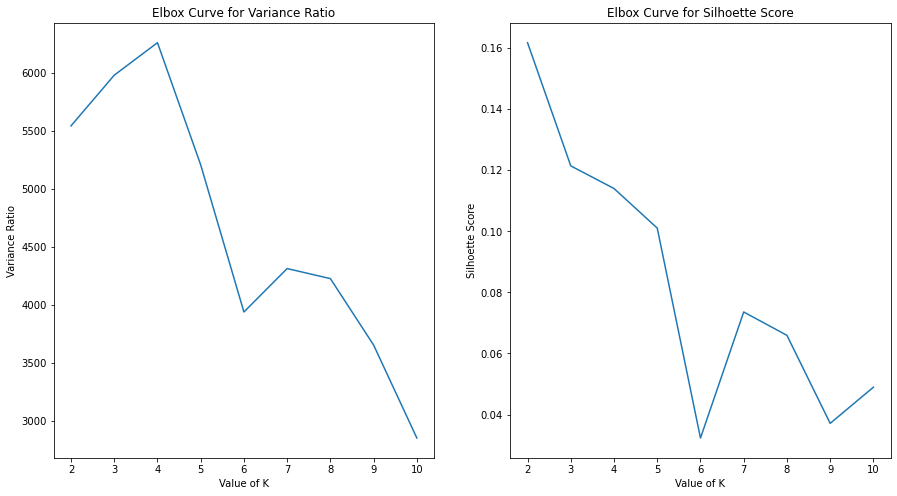

In [105]:
fig, axs = plt.subplots(1,2, figsize=(15,8))

axs[0].plot([i for i in results_kmedoids1.keys()],[i['v_ratio'] for i in results_kmedoids1.values()])
axs[0].set_title('Elbox Curve for Variance Ratio')
axs[0].set_xlabel('Value of K')
axs[0].set_ylabel('Variance Ratio')
axs[1].plot([i for i in results_kmedoids1.keys()],[i['s_score'] for i in results_kmedoids1.values()])
axs[1].set_title('Elbox Curve for Silhoette Score')
axs[1].set_xlabel('Value of K')
axs[1].set_ylabel('Silhoette Score')
plt.show()

In [79]:
# save results for reference later and use in analysis notebook
results_all = {}
results_all['model1'] = results_kmedoids1

Based on the above plots, it would seem that 4 clusters produce the best results. Though the silhoette score is not the best it could be. Could it have to do with the initial tracks picked for the clusters? Below we run the model again using different points to check if k=4 still gives us the best results.

In [77]:
np.random.seed(1613)

# find k clusters
results_kmedoids2 = dict()

k_cand = range(2, 11)

for k in tqdm(k_cand):
    # initiate k random medoids - sets k clusters
    initial_medoids = np.random.randint(0,36450,size=k)
    kmedoids_instance = kmedoids(gdf_model, initial_medoids, data_type='distance_matrix')    

    # run cluster analysis and obtain results
    kmedoids_instance.process()
    clusters = kmedoids_instance.get_clusters()
    medoids = kmedoids_instance.get_medoids()

    # convert cluster output
    cluster_array = pd.DataFrame([(x,e) for e,i in enumerate(clusters) for x in i if len(i)>1]).sort_values(by=0)[1].values
    
    # score
    v_ratio = calinski_harabasz_score(gdf_model, cluster_array)
    s_score = silhouette_score(gdf_model, cluster_array)
    
    # store
    results_kmedoids2[k] = {'k':cluster_array, 'medoids':medoids, 'v_ratio':v_ratio, 's_score':s_score}

100%|██████████| 9/9 [3:03:48<00:00, 1225.37s/it]  


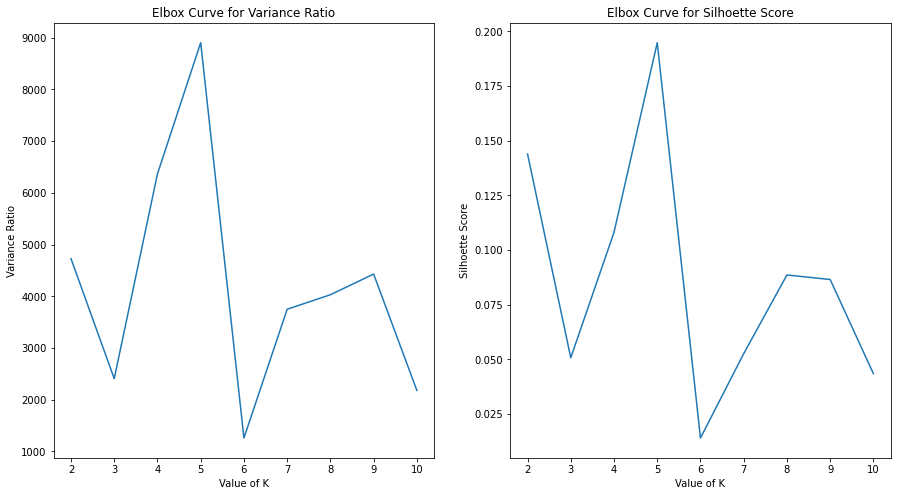

In [106]:
fig, axs = plt.subplots(1,2, figsize=(15,8))

axs[0].plot([i for i in results_kmedoids2.keys()],[i['v_ratio'] for i in results_kmedoids2.values()])
axs[0].set_title('Elbox Curve for Variance Ratio')
axs[0].set_xlabel('Value of K')
axs[0].set_ylabel('Variance Ratio')
axs[1].plot([i for i in results_kmedoids2.keys()],[i['s_score'] for i in results_kmedoids2.values()])
axs[1].set_title('Elbox Curve for Silhoette Score')
axs[1].set_xlabel('Value of K')
axs[1].set_ylabel('Silhoette Score')
plt.show()

In [91]:
# save results for later and use in analysis notebook
results_all['model2'] = results_kmedoids2

When the model was ran this time k=5 provided the best results. This is definitely due to the randomness in picking the initial medoids. This time, both the variance ratio and silhoette score was much better than the first time the algorithm was ran. After running the algorithm a second time, we can see that the best value for k lies between 2 and 6. We can rerun the model again and see if performance improves with different initial medoids. 

In [92]:
np.random.seed(1936)

# find k clusters
results_kmedoids3 = dict()

k_cand = range(2, 7)

for k in tqdm(k_cand):
    # initiate k random medoids - sets k clusters
    initial_medoids = np.random.randint(0,36450,size=k)
    kmedoids_instance = kmedoids(gdf_model, initial_medoids, data_type='distance_matrix')    

    # run cluster analysis and obtain results
    kmedoids_instance.process()
    clusters = kmedoids_instance.get_clusters()
    medoids = kmedoids_instance.get_medoids()

    # convert cluster output
    cluster_array = pd.DataFrame([(x,e) for e,i in enumerate(clusters) for x in i if len(i)>1]).sort_values(by=0)[1].values
    
    # score
    v_ratio = calinski_harabasz_score(gdf_model, cluster_array)
    s_score = silhouette_score(gdf_model, cluster_array)
    
    # store
    results_kmedoids3[k] = {'k':cluster_array, 'medoids':medoids, 'v_ratio':v_ratio, 's_score':s_score}

100%|██████████| 5/5 [1:45:37<00:00, 1267.56s/it]


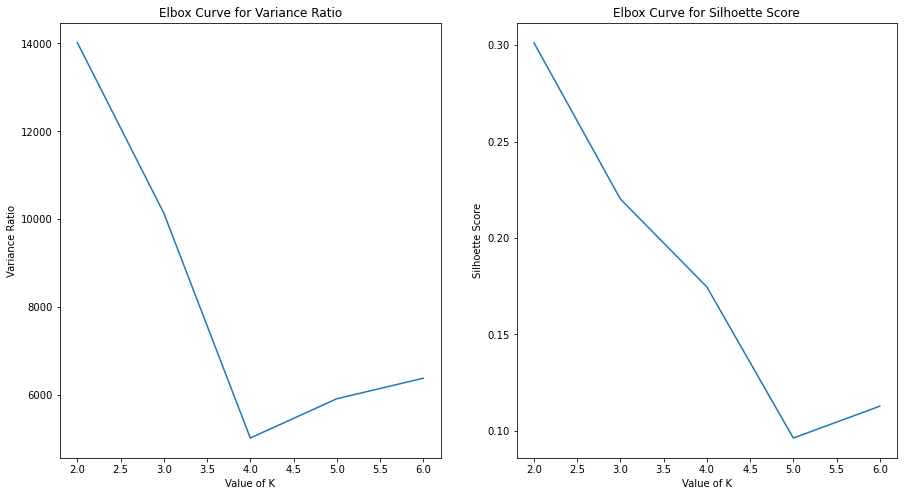

In [107]:
fig, axs = plt.subplots(1,2, figsize=(15,8))

axs[0].plot([i for i in results_kmedoids3.keys()],[i['v_ratio'] for i in results_kmedoids3.values()])
axs[0].set_title('Elbox Curve for Variance Ratio')
axs[0].set_xlabel('Value of K')
axs[0].set_ylabel('Variance Ratio')
axs[1].plot([i for i in results_kmedoids3.keys()],[i['s_score'] for i in results_kmedoids3.values()])
axs[1].set_title('Elbox Curve for Silhoette Score')
axs[1].set_xlabel('Value of K')
axs[1].set_ylabel('Silhoette Score')
plt.show()

In [122]:
# save results for later and use in analysis notebook
results_all['model3'] = results_kmedoids3

In [ ]:
np.random.seed(256)

# find k clusters
results_kmedoids4 = dict()

k_cand = range(2, 7)

for k in tqdm(k_cand):
    # initiate k random medoids - sets k clusters
    initial_medoids = np.random.randint(0,36450,size=k)
    kmedoids_instance = kmedoids(gdf_model, initial_medoids, data_type='distance_matrix')    

    # run cluster analysis and obtain results
    kmedoids_instance.process()
    clusters = kmedoids_instance.get_clusters()
    medoids = kmedoids_instance.get_medoids()

    # convert cluster output
    cluster_array = pd.DataFrame([(x,e) for e,i in enumerate(clusters) for x in i if len(i)>1]).sort_values(by=0)[1].values
    
    # score
    v_ratio = calinski_harabasz_score(gdf_model, cluster_array)
    s_score = silhouette_score(gdf_model, cluster_array)
    
    # store
    results_kmedoids4[k] = {'k':cluster_array, 'medoids':medoids, 'v_ratio':v_ratio, 's_score':s_score}

100%|██████████| 5/5 [1:44:53<00:00, 1258.73s/it]


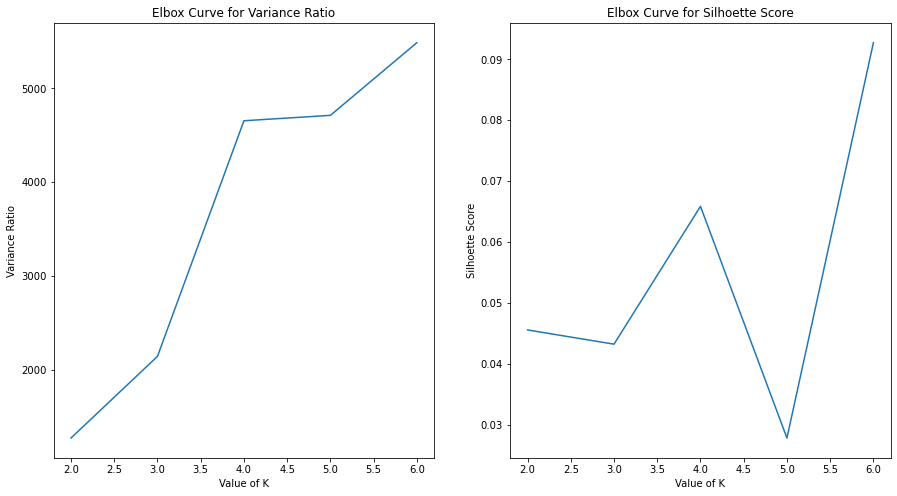

In [112]:
fig, axs = plt.subplots(1,2, figsize=(15,8))

axs[0].plot([i for i in results_kmedoids4.keys()],[i['v_ratio'] for i in results_kmedoids4.values()])
axs[0].set_title('Elbox Curve for Variance Ratio')
axs[0].set_xlabel('Value of K')
axs[0].set_ylabel('Variance Ratio')
axs[1].plot([i for i in results_kmedoids4.keys()],[i['s_score'] for i in results_kmedoids4.values()])
axs[1].set_title('Elbox Curve for Silhoette Score')
axs[1].set_xlabel('Value of K')
axs[1].set_ylabel('Silhoette Score')
plt.show()

In [125]:
# save results for later and use in analysis notebook
results_all['model4'] = results_kmedoids4

In [96]:
 np.random.seed(414)

# find k clusters
results_kmedoids5 = dict()

k_cand = range(2, 7)

for k in tqdm(k_cand):
    # initiate k random medoids - sets k clusters
    initial_medoids = np.random.randint(0,36450,size=k)
    kmedoids_instance = kmedoids(gdf_model, initial_medoids, data_type='distance_matrix')    

    # run cluster analysis and obtain results
    kmedoids_instance.process()
    clusters = kmedoids_instance.get_clusters()
    medoids = kmedoids_instance.get_medoids()

    # convert cluster output
    cluster_array = pd.DataFrame([(x,e) for e,i in enumerate(clusters) for x in i if len(i)>1]).sort_values(by=0)[1].values
    
    # score
    v_ratio = calinski_harabasz_score(gdf_model, cluster_array)
    s_score = silhouette_score(gdf_model, cluster_array)
    
    # store
    results_kmedoids5[k] = {'k':cluster_array, 'medoids':medoids, 'v_ratio':v_ratio, 's_score':s_score}

100%|██████████| 5/5 [1:44:25<00:00, 1253.15s/it]


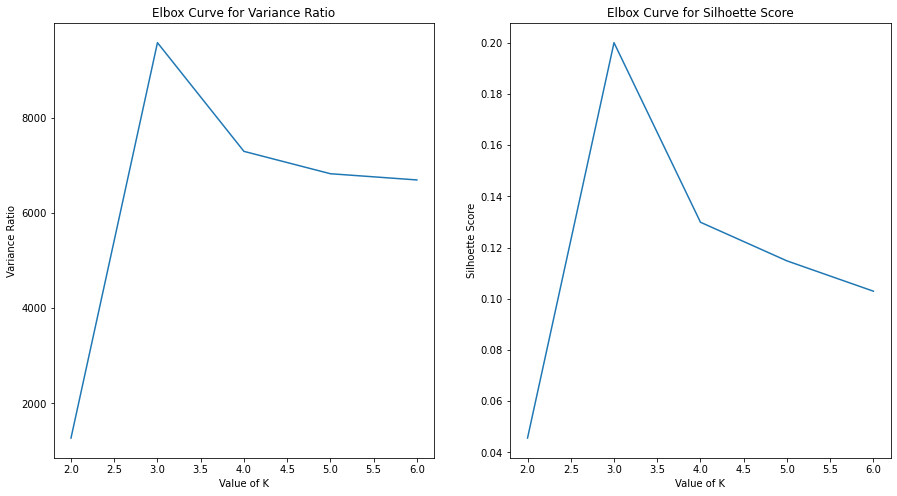

In [113]:
fig, axs = plt.subplots(1,2, figsize=(15,8))

axs[0].plot([i for i in results_kmedoids5.keys()],[i['v_ratio'] for i in results_kmedoids5.values()])
axs[0].set_title('Elbox Curve for Variance Ratio')
axs[0].set_xlabel('Value of K')
axs[0].set_ylabel('Variance Ratio')
axs[1].plot([i for i in results_kmedoids5.keys()],[i['s_score'] for i in results_kmedoids5.values()])
axs[1].set_title('Elbox Curve for Silhoette Score')
axs[1].set_xlabel('Value of K')
axs[1].set_ylabel('Silhoette Score')
plt.show()

In [126]:
# save results for later and use in analysis notebook
results_all['model5'] = results_kmedoids5

In [116]:
np.random.seed(840)

# find k clusters
results_kmedoids6 = dict()

k_cand = range(2, 7)

for k in tqdm(k_cand):
    # initiate k random medoids - sets k clusters
    initial_medoids = np.random.randint(0,36450,size=k)
    kmedoids_instance = kmedoids(gdf_model, initial_medoids, data_type='distance_matrix')    

    # run cluster analysis and obtain results
    kmedoids_instance.process()
    clusters = kmedoids_instance.get_clusters()
    medoids = kmedoids_instance.get_medoids()

    # convert cluster output
    cluster_array = pd.DataFrame([(x,e) for e,i in enumerate(clusters) for x in i if len(i)>1]).sort_values(by=0)[1].values
    
    # score
    v_ratio = calinski_harabasz_score(gdf_model, cluster_array)
    s_score = silhouette_score(gdf_model, cluster_array)
    
    # store
    results_kmedoids6[k] = {'k':cluster_array, 'medoids':medoids, 'v_ratio':v_ratio, 's_score':s_score}

100%|██████████| 5/5 [1:45:13<00:00, 1262.61s/it]


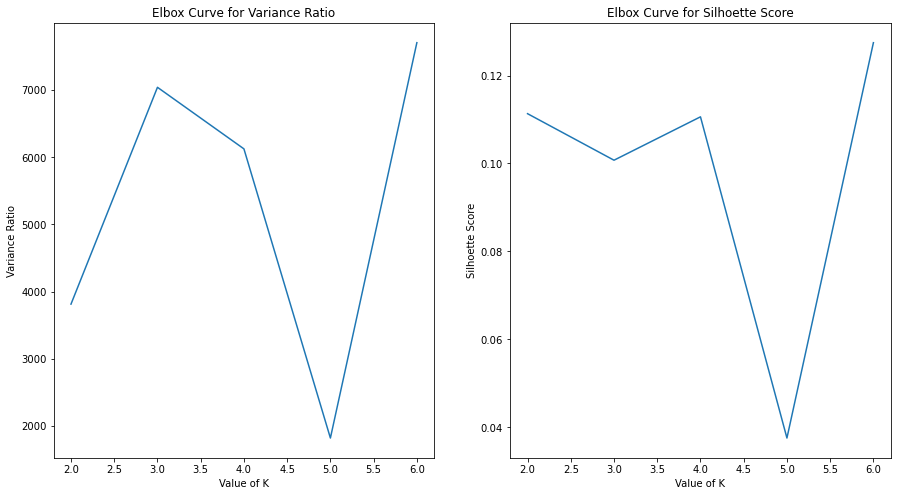

In [117]:
fig, axs = plt.subplots(1,2, figsize=(15,8))

axs[0].plot([i for i in results_kmedoids6.keys()],[i['v_ratio'] for i in results_kmedoids6.values()])
axs[0].set_title('Elbox Curve for Variance Ratio')
axs[0].set_xlabel('Value of K')
axs[0].set_ylabel('Variance Ratio')
axs[1].plot([i for i in results_kmedoids6.keys()],[i['s_score'] for i in results_kmedoids6.values()])
axs[1].set_title('Elbox Curve for Silhoette Score')
axs[1].set_xlabel('Value of K')
axs[1].set_ylabel('Silhoette Score')
plt.show()

In [130]:
# save results for later and use in analysis notebook
results_all['model6'] = results_kmedoids6

In [131]:
 np.random.seed(2354)

# find k clusters
results_kmedoids7 = dict()

k_cand = range(2, 7)

for k in tqdm(k_cand):
    # initiate k random medoids - sets k clusters
    initial_medoids = np.random.randint(0,36450,size=k)
    kmedoids_instance = kmedoids(gdf_model, initial_medoids, data_type='distance_matrix')    

    # run cluster analysis and obtain results
    kmedoids_instance.process()
    clusters = kmedoids_instance.get_clusters()
    medoids = kmedoids_instance.get_medoids()

    # convert cluster output
    cluster_array = pd.DataFrame([(x,e) for e,i in enumerate(clusters) for x in i if len(i)>1]).sort_values(by=0)[1].values
    
    # score
    v_ratio = calinski_harabasz_score(gdf_model, cluster_array)
    s_score = silhouette_score(gdf_model, cluster_array)
    
    # store
    results_kmedoids7[k] = {'k':cluster_array, 'medoids':medoids, 'v_ratio':v_ratio, 's_score':s_score}

100%|██████████| 5/5 [1:42:23<00:00, 1228.78s/it]


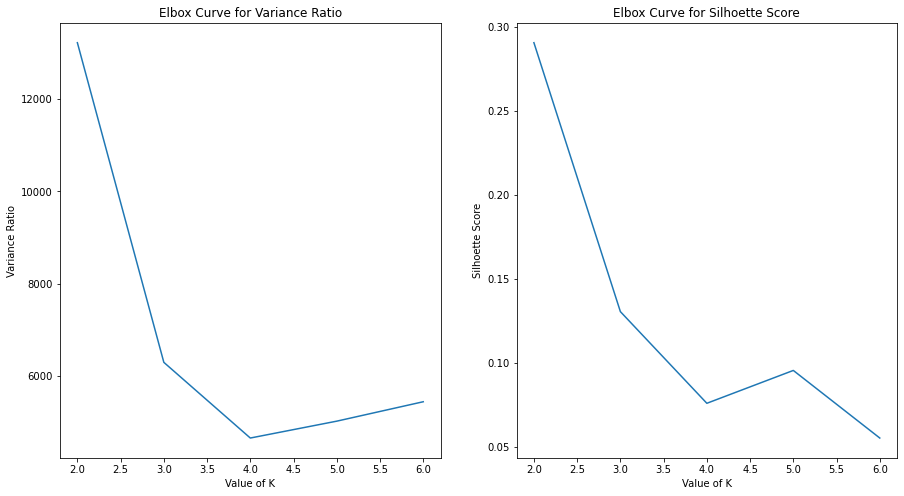

In [132]:
fig, axs = plt.subplots(1,2, figsize=(15,8))

axs[0].plot([i for i in results_kmedoids7.keys()],[i['v_ratio'] for i in results_kmedoids7.values()])
axs[0].set_title('Elbox Curve for Variance Ratio')
axs[0].set_xlabel('Value of K')
axs[0].set_ylabel('Variance Ratio')
axs[1].plot([i for i in results_kmedoids7.keys()],[i['s_score'] for i in results_kmedoids7.values()])
axs[1].set_title('Elbox Curve for Silhoette Score')
axs[1].set_xlabel('Value of K')
axs[1].set_ylabel('Silhoette Score')
plt.show()

In [133]:
# save results for later and use in analysis notebook
results_all['model7'] = results_kmedoids7

In [134]:
np.random.seed(1107)

# find k clusters
results_kmedoids8 = dict()

k_cand = range(2, 7)

for k in tqdm(k_cand):
    # initiate k random medoids - sets k clusters
    initial_medoids = np.random.randint(0,36450,size=k)
    kmedoids_instance = kmedoids(gdf_model, initial_medoids, data_type='distance_matrix')    

    # run cluster analysis and obtain results
    kmedoids_instance.process()
    clusters = kmedoids_instance.get_clusters()
    medoids = kmedoids_instance.get_medoids()

    # convert cluster output
    cluster_array = pd.DataFrame([(x,e) for e,i in enumerate(clusters) for x in i if len(i)>1]).sort_values(by=0)[1].values
    
    # score
    v_ratio = calinski_harabasz_score(gdf_model, cluster_array)
    s_score = silhouette_score(gdf_model, cluster_array)
    
    # store
    results_kmedoids8[k] = {'k':cluster_array, 'medoids':medoids, 'v_ratio':v_ratio, 's_score':s_score}

100%|██████████| 5/5 [1:43:50<00:00, 1246.19s/it]


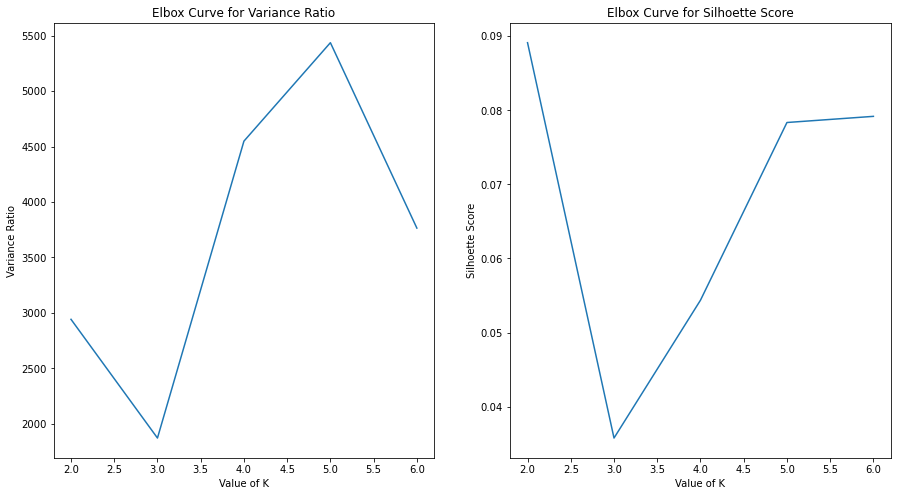

In [135]:
fig, axs = plt.subplots(1,2, figsize=(15,8))

axs[0].plot([i for i in results_kmedoids8.keys()],[i['v_ratio'] for i in results_kmedoids8.values()])
axs[0].set_title('Elbox Curve for Variance Ratio')
axs[0].set_xlabel('Value of K')
axs[0].set_ylabel('Variance Ratio')
axs[1].plot([i for i in results_kmedoids8.keys()],[i['s_score'] for i in results_kmedoids8.values()])
axs[1].set_title('Elbox Curve for Silhoette Score')
axs[1].set_xlabel('Value of K')
axs[1].set_ylabel('Silhoette Score')
plt.show()

In [136]:
# save results for later and use in analysis notebook
results_all['model8'] = results_kmedoids8

In [139]:
np.random.seed(811)

# find k clusters
results_kmedoids9 = dict()

k_cand = range(2, 7)

for k in tqdm(k_cand):
    # initiate k random medoids - sets k clusters
    initial_medoids = np.random.randint(0,36450,size=k)
    kmedoids_instance = kmedoids(gdf_model, initial_medoids, data_type='distance_matrix')    

    # run cluster analysis and obtain results
    kmedoids_instance.process()
    clusters = kmedoids_instance.get_clusters()
    medoids = kmedoids_instance.get_medoids()

    # convert cluster output
    cluster_array = pd.DataFrame([(x,e) for e,i in enumerate(clusters) for x in i if len(i)>1]).sort_values(by=0)[1].values
    
    # score
    v_ratio = calinski_harabasz_score(gdf_model, cluster_array)
    s_score = silhouette_score(gdf_model, cluster_array)
    
    # store
    results_kmedoids9[k] = {'k':cluster_array, 'medoids':medoids, 'v_ratio':v_ratio, 's_score':s_score}

100%|██████████| 5/5 [1:46:28<00:00, 1277.62s/it]


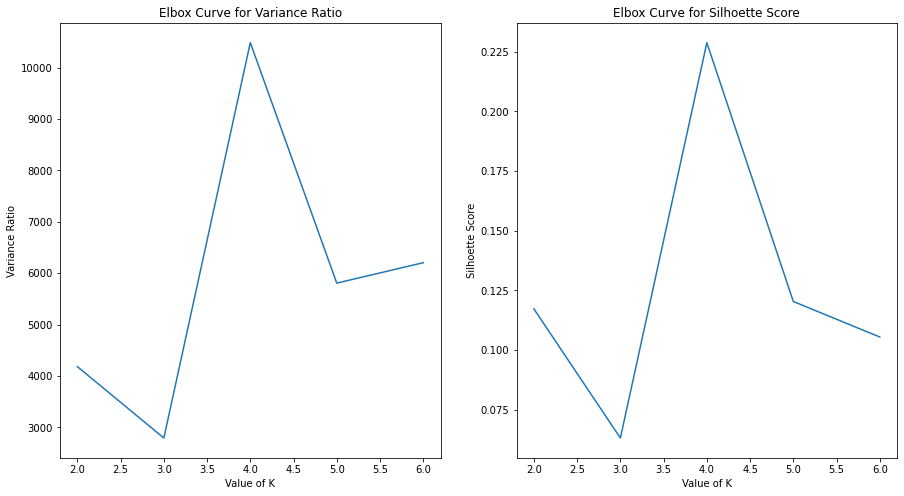

In [140]:
fig, axs = plt.subplots(1,2, figsize=(15,8))

axs[0].plot([i for i in results_kmedoids9.keys()],[i['v_ratio'] for i in results_kmedoids9.values()])
axs[0].set_title('Elbox Curve for Variance Ratio')
axs[0].set_xlabel('Value of K')
axs[0].set_ylabel('Variance Ratio')
axs[1].plot([i for i in results_kmedoids9.keys()],[i['s_score'] for i in results_kmedoids9.values()])
axs[1].set_title('Elbox Curve for Silhoette Score')
axs[1].set_xlabel('Value of K')
axs[1].set_ylabel('Silhoette Score')
plt.show()

In [141]:
# save results for later and use in analysis notebook
results_all['model9'] = results_kmedoids9

Model 9 is the best model so far. The groupings produced the highest variance ratio and silhoette score out of all the models ran so far. The value of k is also the average of the values for the two previously strongest models: Model 2 and Model 5. Seems like its the sweet spot.

In [144]:
np.random.seed(1857)

# find k clusters
results_kmedoids10 = dict()

k_cand = range(2, 7)

for k in tqdm(k_cand):
    # initiate k random medoids - sets k clusters
    initial_medoids = np.random.randint(0,36450,size=k)
    kmedoids_instance = kmedoids(gdf_model, initial_medoids, data_type='distance_matrix')    

    # run cluster analysis and obtain results
    kmedoids_instance.process()
    clusters = kmedoids_instance.get_clusters()
    medoids = kmedoids_instance.get_medoids()

    # convert cluster output
    cluster_array = pd.DataFrame([(x,e) for e,i in enumerate(clusters) for x in i if len(i)>1]).sort_values(by=0)[1].values
    
    # score
    v_ratio = calinski_harabasz_score(gdf_model, cluster_array)
    s_score = silhouette_score(gdf_model, cluster_array)
    
    # store
    results_kmedoids10[k] = {'k':cluster_array, 'medoids':medoids, 'v_ratio':v_ratio, 's_score':s_score}

100%|██████████| 5/5 [1:47:01<00:00, 1284.22s/it]


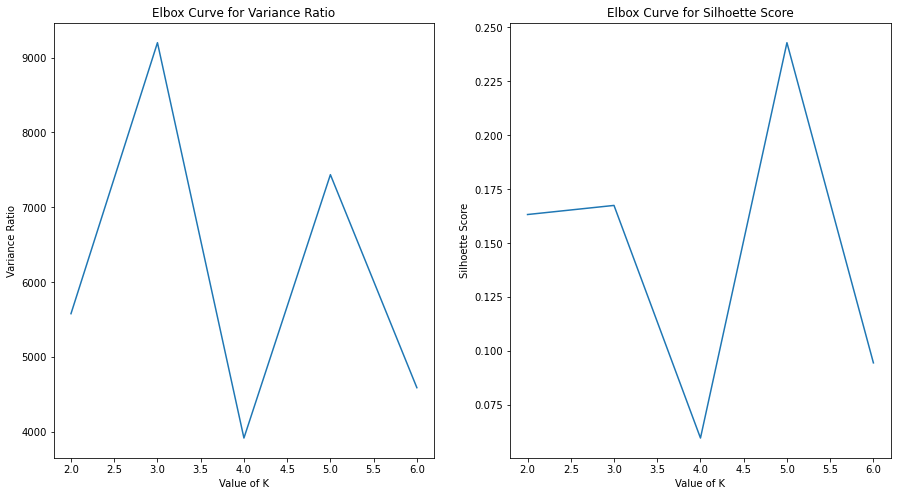

In [145]:
fig, axs = plt.subplots(1,2, figsize=(15,8))

axs[0].plot([i for i in results_kmedoids10.keys()],[i['v_ratio'] for i in results_kmedoids10.values()])
axs[0].set_title('Elbox Curve for Variance Ratio')
axs[0].set_xlabel('Value of K')
axs[0].set_ylabel('Variance Ratio')
axs[1].plot([i for i in results_kmedoids10.keys()],[i['s_score'] for i in results_kmedoids10.values()])
axs[1].set_title('Elbox Curve for Silhoette Score')
axs[1].set_xlabel('Value of K')
axs[1].set_ylabel('Silhoette Score')
plt.show()

In [146]:
# save results for later and use in analysis notebook
results_all['model10'] = results_kmedoids10

This model produced interesting results. It as the highest variance ratio at k=3 but the silhoette score was relatively low. It also had the highest silhoette score out of all the models at k=5, but the variance ratio was relatively low at that point, too. All in all, I believe Model 9 produced the best results.

# Conclusions #

In [167]:
# results of 9
results_all['model9'][4]

{'k': array([3, 1, 3, ..., 3, 2, 3]),
 'medoids': [33715, 31645, 25321, 16834],
 'v_ratio': 10483.229974915155,
 's_score': 0.22875765}

In [168]:
# the medoids of each group 
pop.iloc[[33715, 31645, 25321, 16834]]

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,track_id,artist_id,genre,is_pop
33715,0.0513,['98º'],0.543,205160,0.790,0,0.000004,0,0.0981,-6.145,1,Give Me Just One Night (Una Noche),43,2000-09-26,0.0491,123.631,0.655,2000,1OvjOVieEsYqGiK1T3mUv9,6V03b3Y36lolYP2orXn8mV,"['boy band', 'dance pop']",True
31645,0.2250,['Tina Turner'],0.639,240480,0.669,0,0.001170,4,0.1000,-7.574,0,Private Dancer - Single Edit,51,1991-01-01,0.0507,116.220,0.570,1991,623ZeL2lWuz5v03TVkRBZa,1zuJe6b1roixEKMOtyrEak,"['disco', 'europop', 'new wave pop', 'soft rock']",True
25321,0.1360,['Big Sean'],0.747,213693,0.704,1,0.000000,1,0.1310,-6.743,1,Jump Out The Window,67,2017-02-03,0.0986,136.936,0.494,2017,1jQsKN68yE94tMYml0wHMd,0c173mlxpT3dSFRgMO8XPh,"['detroit hip hop', 'hip hop', 'pop rap', 'rap...",True
16834,0.4980,['Gregory Alan Isakov'],0.622,210733,0.369,0,0.004570,0,0.1090,-11.152,1,Evelyn,44,2009-05-15,0.0293,114.857,0.353,2009,63XEl1dXbErfNDia83Ao3B,5sXaGoRLSpd7VeyZrLkKwt,"['indie folk', 'neo mellow', 'new americana', ...",True


After running ten different models, Model 9 produced the best results. With a K value of 4, the variance ratio and silhoette score was the highest at 10483.23 and 0.229, respectively. Above are the tracks that the algorithm chose to form the clusters. After listening to them, they are very distict. This will be the model I'll chose to further analyze. Analysis can be found in the KMedoids_Analysis notebook.

In [202]:
# export final model dictionary for analysis
import pickle
final_results = results_all['model9'][4]
pickle.dump(final_results, open("model_results.p", "wb"))

In [181]:
# similarity dataframe with medoids as the columns and all tracks as rows
df_results = gdf_model.iloc[[33715, 31645, 25321, 16834]].T
df_results.head()

track_id,1OvjOVieEsYqGiK1T3mUv9,623ZeL2lWuz5v03TVkRBZa,1jQsKN68yE94tMYml0wHMd,63XEl1dXbErfNDia83Ao3B
0,0.218438,0.254809,0.278542,0.113587
1,0.237460,0.175485,0.325105,0.310158
2,0.105862,0.246640,0.282148,0.086823
3,0.254998,0.290001,0.232987,0.151798
4,0.201921,0.248245,0.288763,0.138733
